In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

Read in target data

In [2]:
data = pd.read_csv("data/training_variants.csv",index_col='ID')

In [3]:
data.head()

,Gene,Variation,Class
ID,,,
0,FAM58A,Truncating Mutations,1
1,CBL,W802*,2
2,CBL,Q249E,2
3,CBL,N454D,3
4,CBL,L399V,4


In [4]:
data.tail()

,Gene,Variation,Class
ID,,,
3316,RUNX1,D171N,4
3317,RUNX1,A122*,1
3318,RUNX1,Fusions,1
3319,RUNX1,R80C,4
3320,RUNX1,K83E,4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3321 non-null   object
 1   Variation  3321 non-null   object
 2   Class      3321 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 103.8+ KB


Read in text data

In [6]:
text = pd.read_csv('data/training_text.csv', sep = '\|\|', engine = 'python', names = ['ID','Text'], skiprows = 1, index_col = 'ID')

In [7]:
text.head()

,Text
ID,
0,Cyclin-dependent kinases (CDKs) regulate a var...
1,Abstract Background Non-small cell lung canc...
2,Abstract Background Non-small cell lung canc...
3,Recent evidence has demonstrated that acquired...
4,Oncogenic mutations in the monomeric Casitas B...


In [11]:
text.tail()

,Text
ID,
3316,Introduction Myelodysplastic syndromes (MDS) ...
3317,Introduction Myelodysplastic syndromes (MDS) ...
3318,The Runt-related transcription factor 1 gene (...
3319,The RUNX1/AML1 gene is the most frequent targe...
3320,The most frequent mutations associated with le...


In [12]:
text.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    3316 non-null   object
dtypes: object(1)
memory usage: 51.9+ KB


Combine data sets

In [18]:
merged = data.merge(text, how='left', on='ID')

(array([568., 452.,  89., 686., 242., 275., 953.,  19.,  37.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

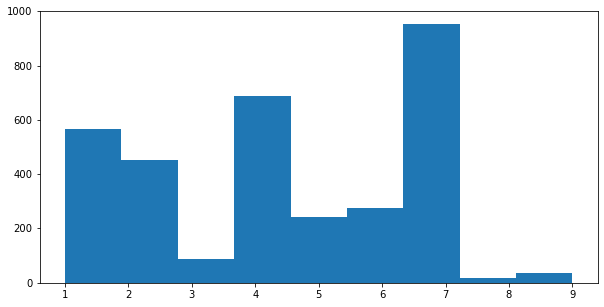

In [20]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(merged['Class'], bins=9)

<AxesSubplot:>

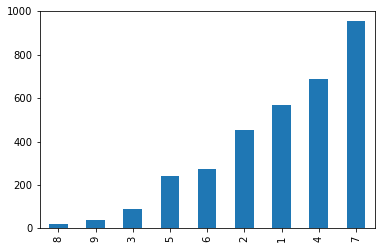

In [21]:
merged.Class.value_counts().sort_values().plot(kind = 'bar')
# df.letters.value_counts().sort_values().plot(kind = 'barh')

/home/shredder/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Class')

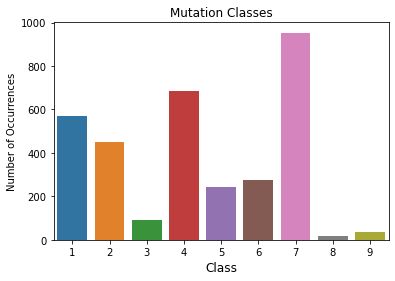

In [22]:
class_count  = merged['Class'].value_counts()
sns.barplot(class_count.index, class_count.values)
plt.title('Mutation Classes')
plt.ylabel('Number of Occurrences')
plt.xlabel('Class', fontsize=12)

In [29]:
merged[merged.isnull().any(axis=1)]

,Gene,Variation,Class,Text
ID,,,,
1109,FANCA,S1088F,1,NaN
1277,ARID5B,Truncating Mutations,1,NaN
1407,FGFR3,K508M,6,NaN
1639,FLT1,Amplification,6,NaN
2755,BRAF,G596C,7,NaN


In [32]:
# drop where text is missing
merged = merged.dropna(how='any', subset=['Text'])

In [33]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3316 entries, 0 to 3320
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Gene       3316 non-null   object
 1   Variation  3316 non-null   object
 2   Class      3316 non-null   int64 
 3   Text       3316 non-null   object
dtypes: int64(1), object(3)
memory usage: 129.5+ KB


Where to do the train-test split? All preprocessing done first. Or don't split this data set and use the test data set provided - Need to download

Try different models to classify - logistic reg, random forest, naive bayes - really want to try that one out
keep going with this project this is for a github test

In [34]:
text_list = merged.Text.tolist()

In [35]:
len(text_list)

3316

In [36]:
vectorizer = CountVectorizer()

In [37]:
X = vectorizer.fit_transform(text_list)

In [39]:
X.shape

(3316, 155732)

In [41]:
vectorizer = CountVectorizer(stop_words='english')

In [42]:
X = vectorizer.fit_transform(text_list)

In [43]:
X.shape

(3316, 155436)